## 請安裝
> pip install opencv-python

In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 991.0 kB/s eta 0:00:39
   ---------------------------------------- 0.2/38.1 MB 2.4 MB/s eta 0:00:17
   ---------------------------------------- 0.5/38.1 MB 3.5 MB/s eta 0:00:11
    --------------------------------------- 0.9/38.1 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.4/38.1 MB 6.5 MB/s eta 0:00:06
   - -------------------------------------- 1.9/38.1 MB 7.5 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.1 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.1 MB 8.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.1 MB 8.3 MB/s eta 0:00:05
   ---- ------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [3]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print('center:', center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [4]:
#online 課程的解說
h, w, c = img.shape
print(img.shape)

#Z: 2d, 每筆資料有RGB三個特徵值
Z = img.reshape((-1,3))
#print(Z.shape)
#print(Z.ndim)
#print(Z)


#預計分兩群: k= 2
K = 2
label, center = km_clust(Z, K)
#print(len(label),type(label), label[:10])
#result: 兩組資料的中心點，每個點有RBG 三個數值


(1024, 1024, 3)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[107.6958206   95.56751108  71.60331411]
 [163.22627536 197.72436505 120.58396853]]


In [5]:
#center: 把中心數值放在像素
#先把數值整數化L convert to unit8. to show image
center = np.uint8(center[:,:3])
print('center[0]:', center[0]) 
print('center[1]:', center[1]) 

#label: 
print(len(label))
print(label.ndim)
 
#center(label): 出len(label) 筆資料，如果是0 ,代入第一筆center, 1 代入第二筆
res = center[label].reshape(img.shape)

center[0]: [107  95  71]
center[1]: [163 197 120]
1048576
1


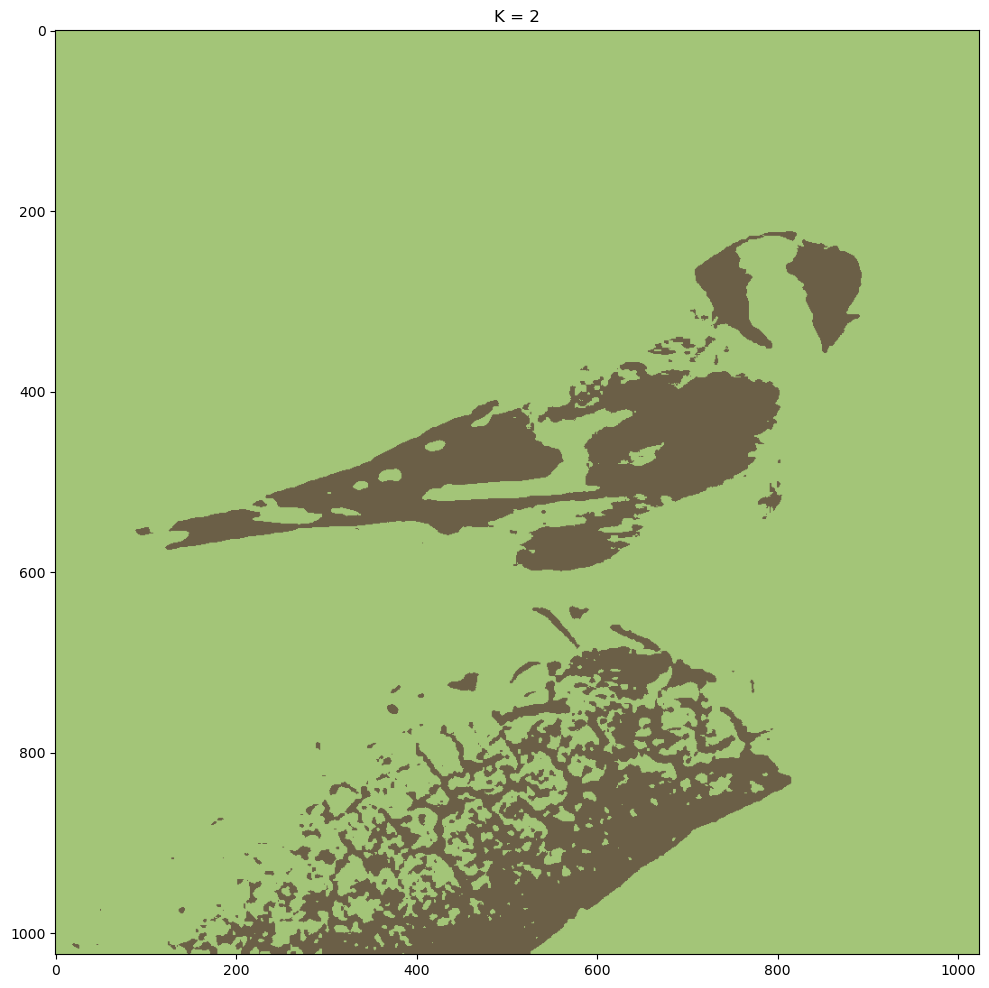

In [6]:
#畫圖
plt.figure(figsize = (16,12))
plt.title("K = {}".format(K))
plt.imshow(res)



C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[163.22475646 197.71781744 120.58206446]
 [107.66883528  95.54092553  71.58297852]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[160.65926597 204.74996744 114.71744843]
 [ 58.08552006  54.97276835  46.05160932]
 [143.85639519 128.22294861  97.13896489]
 [183.98377567 182.77495868 164.99751126]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[170.36704436 164.7325241  142.97615202]
 [114.91369658  99.12908896  67.49796569]
 [154.66220245 192.87260663 110.8748438 ]
 [ 38.1735575   40.41476215  40.94678546]
 [149.15008077 133.61048177 103.92651067]
 [163.46221368 211.87462151 117.7034028 ]
 [198.73757118 199.82504746 187.60510259]
 [220.0843111  190.55564868  36.91619175]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[157.19010748 192.92866557 112.21183594]
 [135.48805143 122.53526127  93.97599463]
 [ 25.87358968  27.17769975  26.08490675]
 [177.79161694 179.14348117 155.31309973]
 [164.79610581 156.12414022 134.29339401]
 [ 45.76904408  56.75510843  69.61465591]
 [165.26349654 213.78543487 119.41337156]
 [167.11840734 113.6939754   55.93422973]
 [218.43160275 217.79424298 212.57439777]
 [114.22997886 102.56848873  71.6328969 ]
 [155.49807506 139.88568164 109.97486156]
 [140.76966076 182.25459431 107.43865458]
 [227.98302954 201.81646763  36.93882254]
 [ 92.26857808  74.32898364  43.69717576]
 [159.12661625 207.11215627 112.58073789]
 [192.96466264 194.64302351 181.59014484]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[112.90289971  99.45166268  65.3066241 ]
 [163.26784137 211.64274114 119.70546381]
 [168.30156577 166.82489729 151.78687699]
 [ 30.3979571   38.83146067  45.30551583]
 [199.26320765 200.25102881 189.109554  ]
 [140.17789342 181.86349999 106.99360115]
 [166.09394686 144.27115859  91.95243312]
 [154.5586118  191.19231293 110.81921348]
 [233.90046899 210.56722251  37.87206879]
 [130.67848411 127.59039264 114.43053358]
 [ 73.60497696  53.09935484  25.59078341]
 [221.53166898 220.9696024  216.95018493]
 [186.04709872 146.73737754  29.85380558]
 [143.4320214  126.54845243  93.80389759]
 [175.28430567 204.61560189 142.84742194]
 [158.69868219 198.9698221  109.34562926]
 [196.6740644  176.4240644  136.26860313]
 [ 95.24915554  80.57013029  48.97860705]
 [154.85458077 139.03541599 111.97520233]
 [159.08546204 208.23148397 112.87007409]
 [182.57548465 182.20758278 171.59306914]
 [219.06339623 102.60981132  86.19245283]
 [ 47.16074284  58.70065183  73.59599065]
 [152.95864736 148.7507933

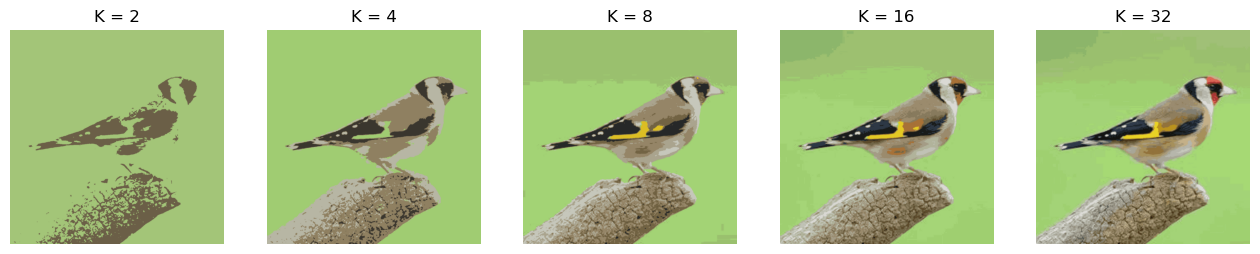

In [7]:
h, w, c = img.shape
 
Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-2. cluster with RGB values and the location

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[154.41622064 186.42321443 117.0310708  512.65521544 255.03225172]
 [156.47485888 180.41584944 110.4263967  510.34903809 767.02342862]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[151.81912629 193.99577782 111.30420728 255.9830616  254.19548895]
 [157.31135184 183.25841889 111.52165786 767.09923016 768.72401324]
 [155.56999779 177.51196985 109.32565762 255.43437113 765.96188506]
 [157.08598883 178.9279213  122.74106118 768.30155383 256.49850718]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[146.21626484 144.29691893 104.23944934 823.31118071 519.22738728]
 [157.77833386 182.92050115 114.63963142 174.58503088 860.52213648]
 [147.98947113 187.01245422 110.6113946  514.41230881 248.33350388]
 [157.63248627 196.2544502  111.30897577 199.62237773 509.71161818]
 [164.86391533 189.73095706 134.34349892 845.80485209 164.11682312]
 [160.43140987 203.15565367 117.82702328 845.89220463 865.50733354]
 [152.5013836  194.8503894  112.04974316 177.74806131 161.46555924]
 [158.32892573 174.46128912 108.29601759 507.75379462 775.94623583]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[162.5114159  210.21060894 118.61227244 369.86949517 150.20213997]
 [167.61418508 215.43037531 119.93518356 654.82675669 885.69716766]
 [168.54228149 192.36492245 141.82548195 889.40794318 130.06129874]
 [158.39175718 198.19230093 109.81093181 146.98206436 625.23067455]
 [168.75229916 200.36895933 132.30498868 686.05425872 360.67243345]
 [163.92152663 164.0621394  113.47028081 627.61859707 617.4118653 ]
 [161.62029202 188.95550902 114.93563007 129.05579301 889.32278191]
 [140.73427405 143.92837673  94.08961944 880.37225728 643.96129693]
 [154.88600132 195.86962333 110.67303119 143.20426053 376.75523068]
 [139.90293398 128.59505078 104.72400866 919.21945896 396.78480032]
 [147.2576396  187.77129439 109.6299376  120.98793747 123.75172092]
 [126.13712664 112.76450259  86.67304369 393.94054378 702.29867405]
 [156.16148056 202.11307519 116.5250097  620.3455265  119.37406689]
 [132.48102937 159.03664959  96.56142567 421.01596855 424.44906389]
 [159.34835201 209.12227912 118.2644387 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[164.00772133 189.66445722 116.72033988 368.48873532 516.76419984]
 [156.63453272 209.63877833 115.39531922 924.63148119 927.28299634]
 [142.66365151 133.1321114  113.80712925 941.27680909 328.89395382]
 [158.71359637 190.95675174 113.95966764 107.26459887 931.61146234]
 [168.04841567 206.3699075  121.00127928 316.3259857  952.71357344]
 [149.62285732 189.97845244 111.06485394  75.71411758 319.1740705 ]
 [172.27253405 200.00115458 127.76310058 616.3929518  746.44015849]
 [163.07432358 211.78008139 120.88649362 450.28390343 106.73559173]
 [158.12051926 201.60967416 112.52816465 238.41997456 236.79927591]
 [175.36336766 198.1012268  150.23820875 791.79614798 262.71748665]
 [160.06624894 207.72975002 115.96602702 791.62042295  83.44749037]
 [166.78235184 214.87246812 122.43145161 736.57145536 911.93363185]
 [116.68271609  99.96232169  73.48460001 442.01331617 685.45247857]
 [156.02892272 193.66952576 110.17710773  78.30828454 540.00966042]
 [161.78504887 209.25597359 119.66250449

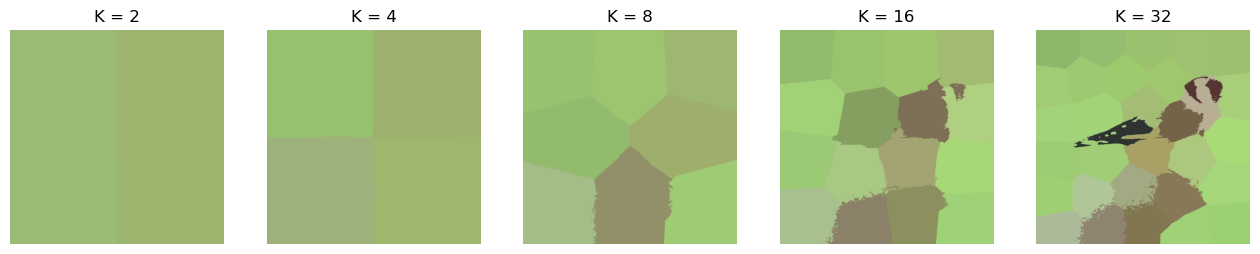

In [8]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

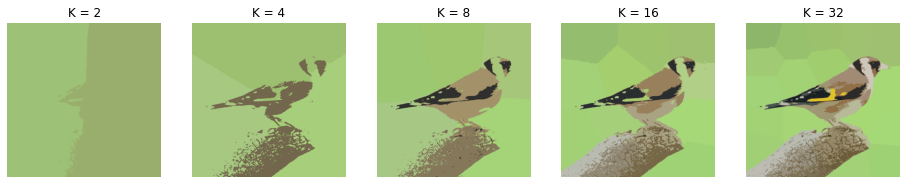

In [29]:
#Ivy Answer: 差別在一個是區分色彩，一個是區分區塊位置

In [ ]:
#重新rescale: 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[157.93484365 193.13603806 119.93866056 122.17876601  60.96929035]
 [153.22628828 174.73260762 108.17199671 132.9615009  187.61902615]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[167.56725992 206.29433003 122.99697294 170.36800271 211.5704977 ]
 [157.88709691 192.3704844  112.37850139  45.57235333 126.54716875]
 [166.11799237 200.088341   129.39817053 166.03665547  51.1154721 ]
 [114.08049275 102.03768398  76.0414193  173.79251704 137.48334145]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[164.59720469 211.36560045 120.34649154 194.57405215 212.36650358]
 [167.98443533 200.41955754 133.59513753 188.13131878  53.03711684]
 [158.04298903 199.65847294 110.68369251  45.11843204 125.88035083]
 [ 47.1519062   48.04243419  45.9659295  116.6691018  136.71156165]
 [166.6320664  198.48922765 122.22758631  56.57179423 220.65843311]
 [156.22177266 200.99097116 114.55379947  67.60675697  41.80420321]
 [132.13508888 119.81273495  90.20676262 218.43117928 127.92924682]
 [162.74802097 145.23623304 105.95821919 124.26486163 156.58836091]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[160.71114391 210.28888963 119.08489585 226.41086383 212.17173437]
 [157.40198033 196.85849725 109.44771177  33.08011585 143.70820319]
 [165.59766223 208.60019737 121.89668901 161.14494504  85.66004951]
 [164.74511189 158.33382342 126.28753914 177.54038895 148.2253351 ]
 [148.50901889 189.26696598 110.12711969  29.6318992   45.01868199]
 [117.36259629 103.45232042  69.37200698 217.12180776 145.5783592 ]
 [167.13354557 217.22412296 117.72985963 142.86820644 223.05462758]
 [153.65457802 128.27480154  92.40025142 109.46983434 163.48029137]
 [144.66924878 135.86829113 115.48169823 229.23804001  88.14204618]
 [161.33919043 208.84301058 117.1302004  188.66321345  25.30203147]
 [164.58929903 207.91753223 110.68646799  81.27257111 101.5032525 ]
 [ 42.7292349   45.6287058   45.6244786  114.54551944 134.06803421]
 [195.54599169 190.66092326 171.41825182 103.11645637 191.44460222]
 [186.64086725 187.05564306 176.61790619 221.93525127  54.99370601]
 [160.42654495 193.41288229 114.16700297

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


center: [[162.39838794 210.70146661 116.46493071  91.0788554   81.30016969]
 [167.95202706 216.28728138 118.12691914 108.03309822 235.12260803]
 [150.12873569 136.97900074 104.91510666 199.15369152 152.59847243]
 [141.2977889  182.90290641 107.3121958   20.19432624  26.22686692]
 [ 76.75079774  86.51991765  81.47267113 129.03376222  83.68226969]
 [157.41045488 209.71443163 116.32617578 228.47828332 229.86624977]
 [162.48992369 210.40722624 115.98899976 164.99980434  33.12875823]
 [158.82550899 195.10431773 112.04432428  29.32368092 180.73967679]
 [155.97794213 193.62543295 109.94419125  21.65359124 127.56616709]
 [161.68278208 140.02960469 116.44726339  95.16511644 180.14906466]
 [166.24144389 216.16568494 116.3877662  156.17250415 198.56736898]
 [160.56400601 203.04080368 116.01894797  65.66161785  28.29231713]
 [166.16785664 213.0284654  118.4339565  163.95357931  91.58783879]
 [188.84732623 189.04735266 178.63884239 235.20801031  36.32855035]
 [124.46339203 111.6460797   83.44986098

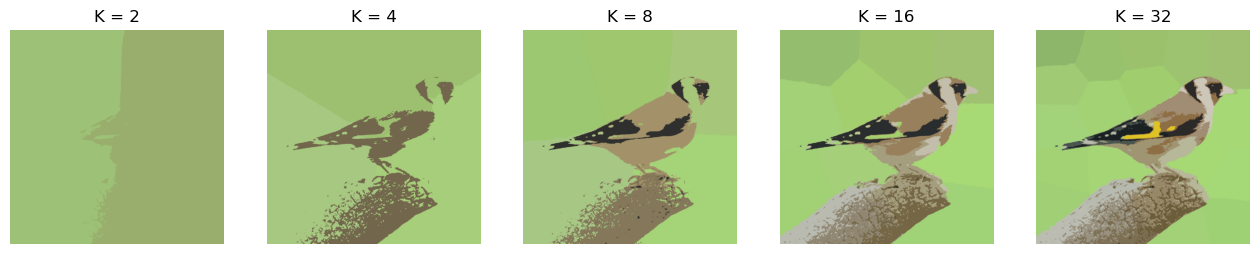

In [9]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()